In [1]:
from prevelop import preparation, exploration, clustering, evaluation

__Data Preparation and Preprocessing__

In [ ]:
file = '/Users/kaspar/Documents/FIR/Prevelop/data/Simus/csvfolding-2025-03-19_13-23-25.csv'

In [3]:
### load cad-data
cad_data, num_columns, cat_columns = preparation.load_simus_data(file)

In [4]:
cad_data

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_einseitig steigend,Innenform_EXCENTR_001,Innenform_Durchgangsbohrung gesenkt,Innenform_ungleichmäßiger Einstich Konus beidseitig,Innenform_gleichmäßiger Einstich Konus beidseitig,Innenform_beidseitig fallend,Innenform_OTHR_004,Innenform_Sackloch gestuft gesenkt,Innenform_OTHR_005,Innenform_OTHR_009
Zeichnung,,,,,,,,,,,,,,,,,,,,,
3443-693-A-V10-CAM,609.48,22.2,6.0,6.0,6.0,0.0,22.2,0.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-070-PFA-CAM,5871.83,72.5,14.0,14.0,14.0,0.0,72.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-071-PFA-CAM,7590.52,94.5,14.0,14.0,14.0,0.0,94.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-078-PFA-CAM,5925.80,72.5,14.0,14.0,14.0,0.0,72.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-081-V10-CAM,9216.14,159.5,14.0,14.0,14.0,0.0,159.5,0.0,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166-972-56-V10-CAM,123396.76,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166-972-57-V10-CAM,139295.27,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166-972-58-V10-CAM,127394.93,90.0,80.0,80.0,80.0,0.0,90.0,9.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data, data_preprocessed = preparation.prepare_data(cad_data, num_columns, cat_columns, process_data=None, link_data=None)

In [6]:
data_preprocessed

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_einseitig steigend,Innenform_EXCENTR_001,Innenform_Durchgangsbohrung gesenkt,Innenform_ungleichmäßiger Einstich Konus beidseitig,Innenform_gleichmäßiger Einstich Konus beidseitig,Innenform_beidseitig fallend,Innenform_OTHR_004,Innenform_Sackloch gestuft gesenkt,Innenform_OTHR_005,Innenform_OTHR_009
Zeichnung,,,,,,,,,,,,,,,,,,,,,
3443-693-A-V10-CAM,0.000092,0.010546,0.026087,0.026087,0.026087,0.0,0.010546,0.0,0.1,0.133333,...,0,0,0,0,0,0,0,0,0,0
3500-070-PFA-CAM,0.000883,0.034442,0.060870,0.060870,0.060870,0.0,0.034442,0.0,0.5,0.133333,...,0,0,0,0,0,0,0,0,0,0
3500-071-PFA-CAM,0.001141,0.044893,0.060870,0.060870,0.060870,0.0,0.044893,0.0,0.5,0.133333,...,0,0,0,0,0,0,0,0,0,0
3500-078-PFA-CAM,0.000891,0.034442,0.060870,0.060870,0.060870,0.0,0.034442,0.0,0.5,0.133333,...,0,0,0,0,0,0,0,0,0,0
3500-081-V10-CAM,0.001385,0.075772,0.060870,0.060870,0.060870,0.0,0.075772,0.0,0.6,0.200000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166-972-56-V10-CAM,0.018546,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,1.0,0.2,0.000000,...,0,0,0,0,0,0,0,0,0,0
7166-972-57-V10-CAM,0.020936,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,1.0,0.2,0.000000,...,0,0,0,0,0,0,0,0,0,0
7166-972-58-V10-CAM,0.019147,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,0.9,0.2,0.000000,...,0,0,0,0,0,0,0,0,0,0


__Exploration__

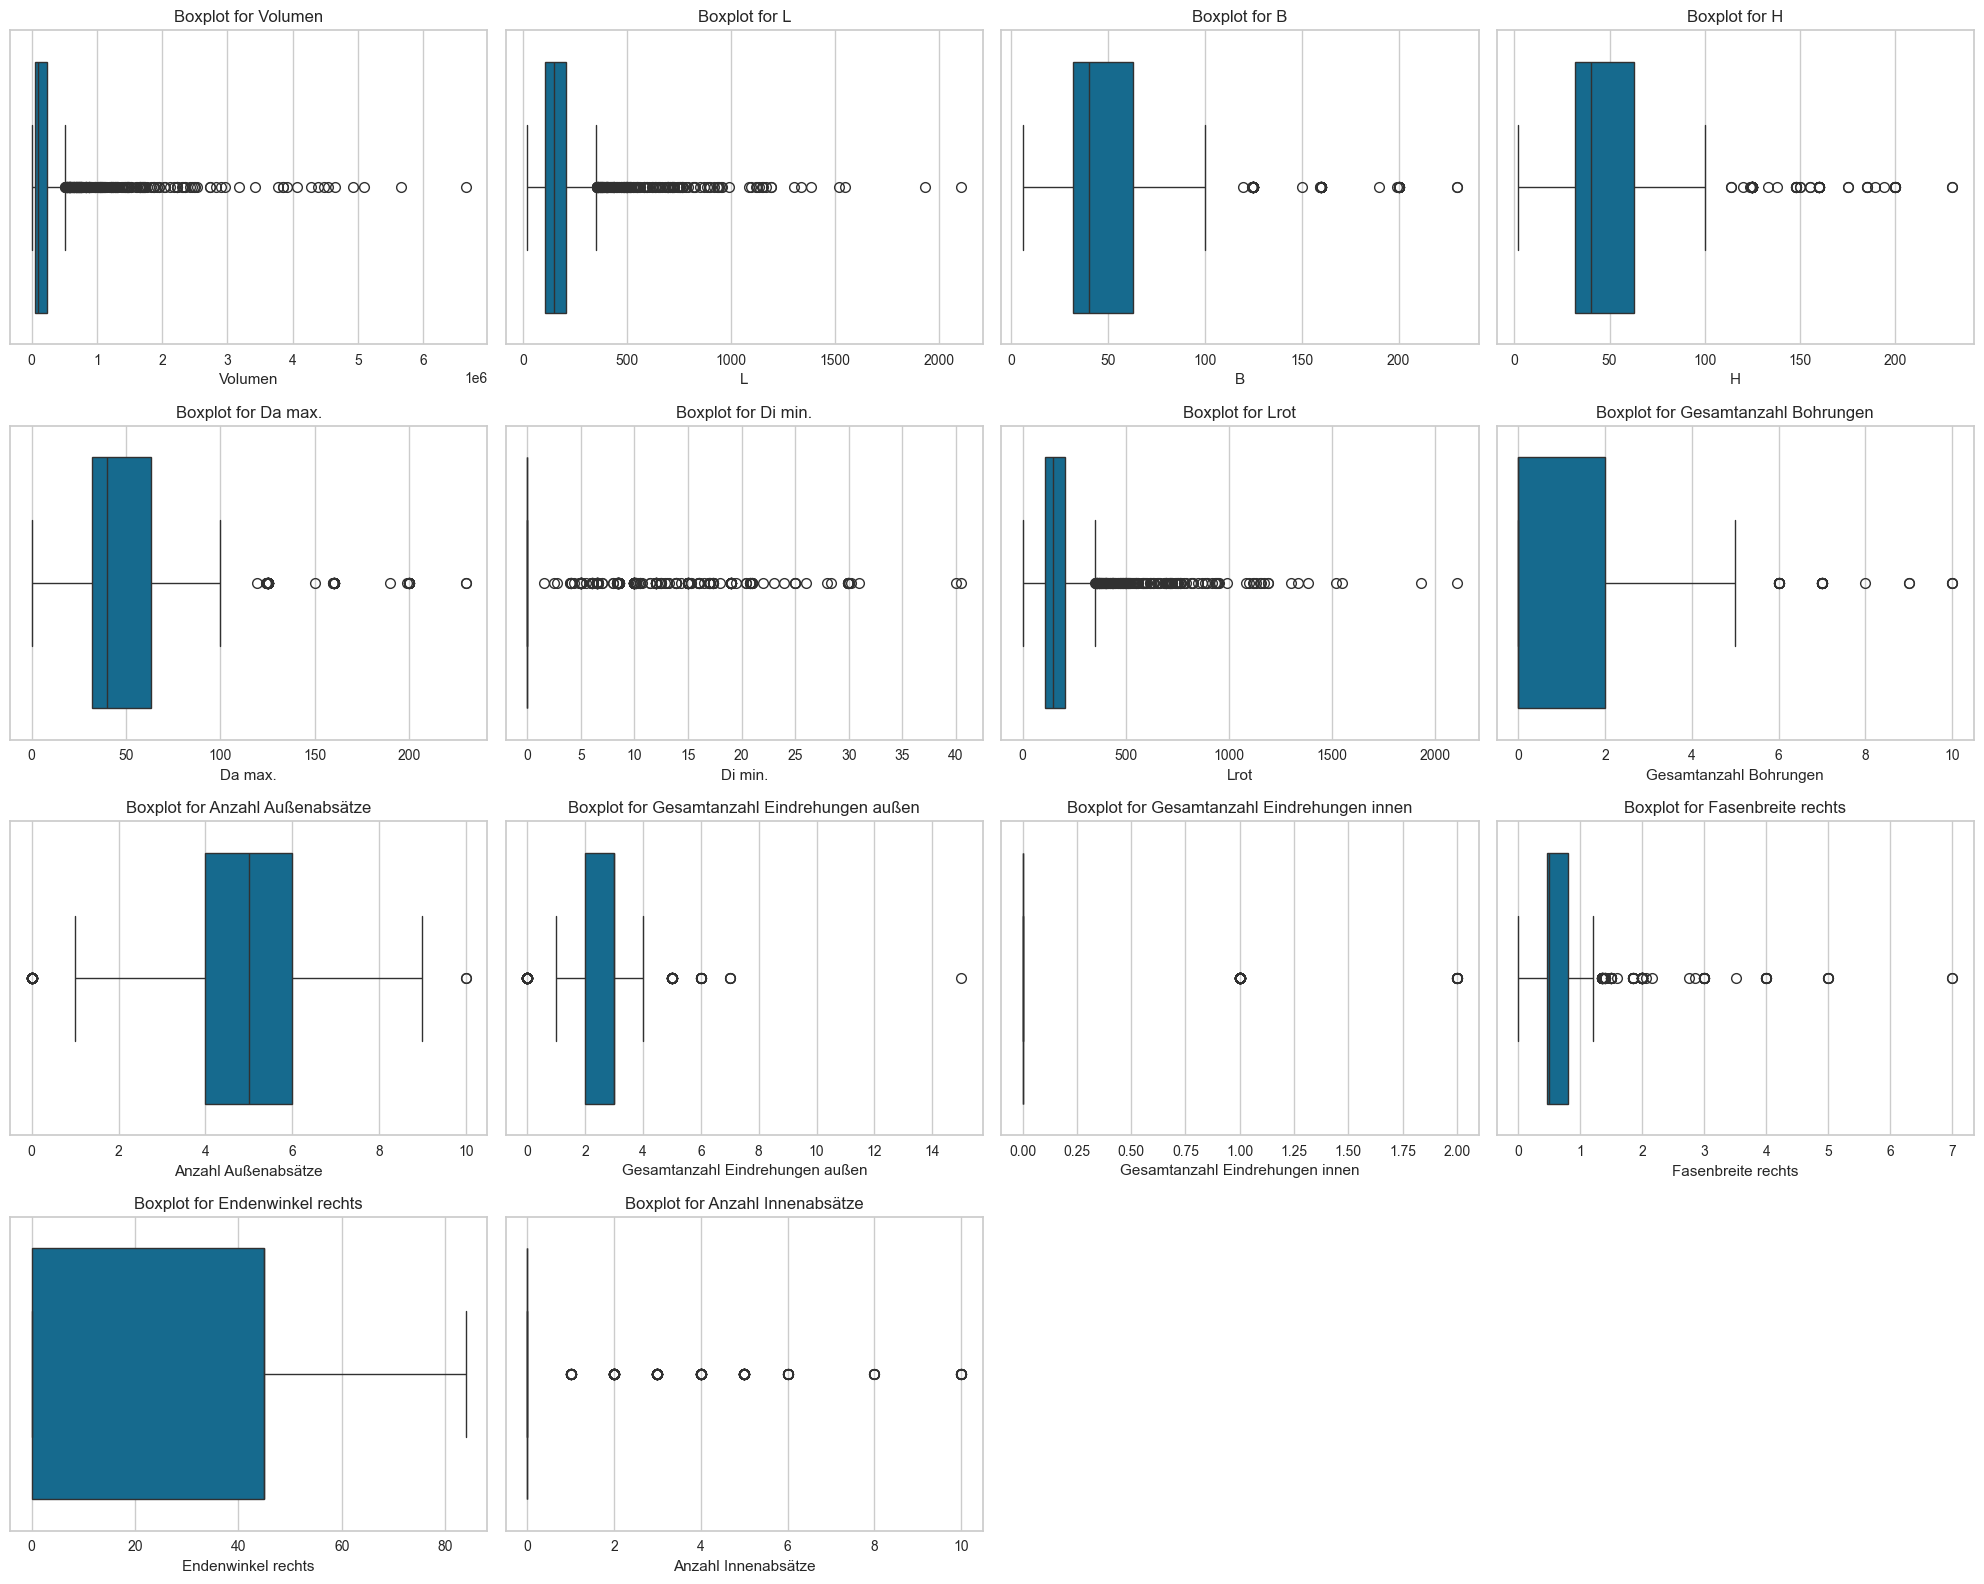

In [7]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

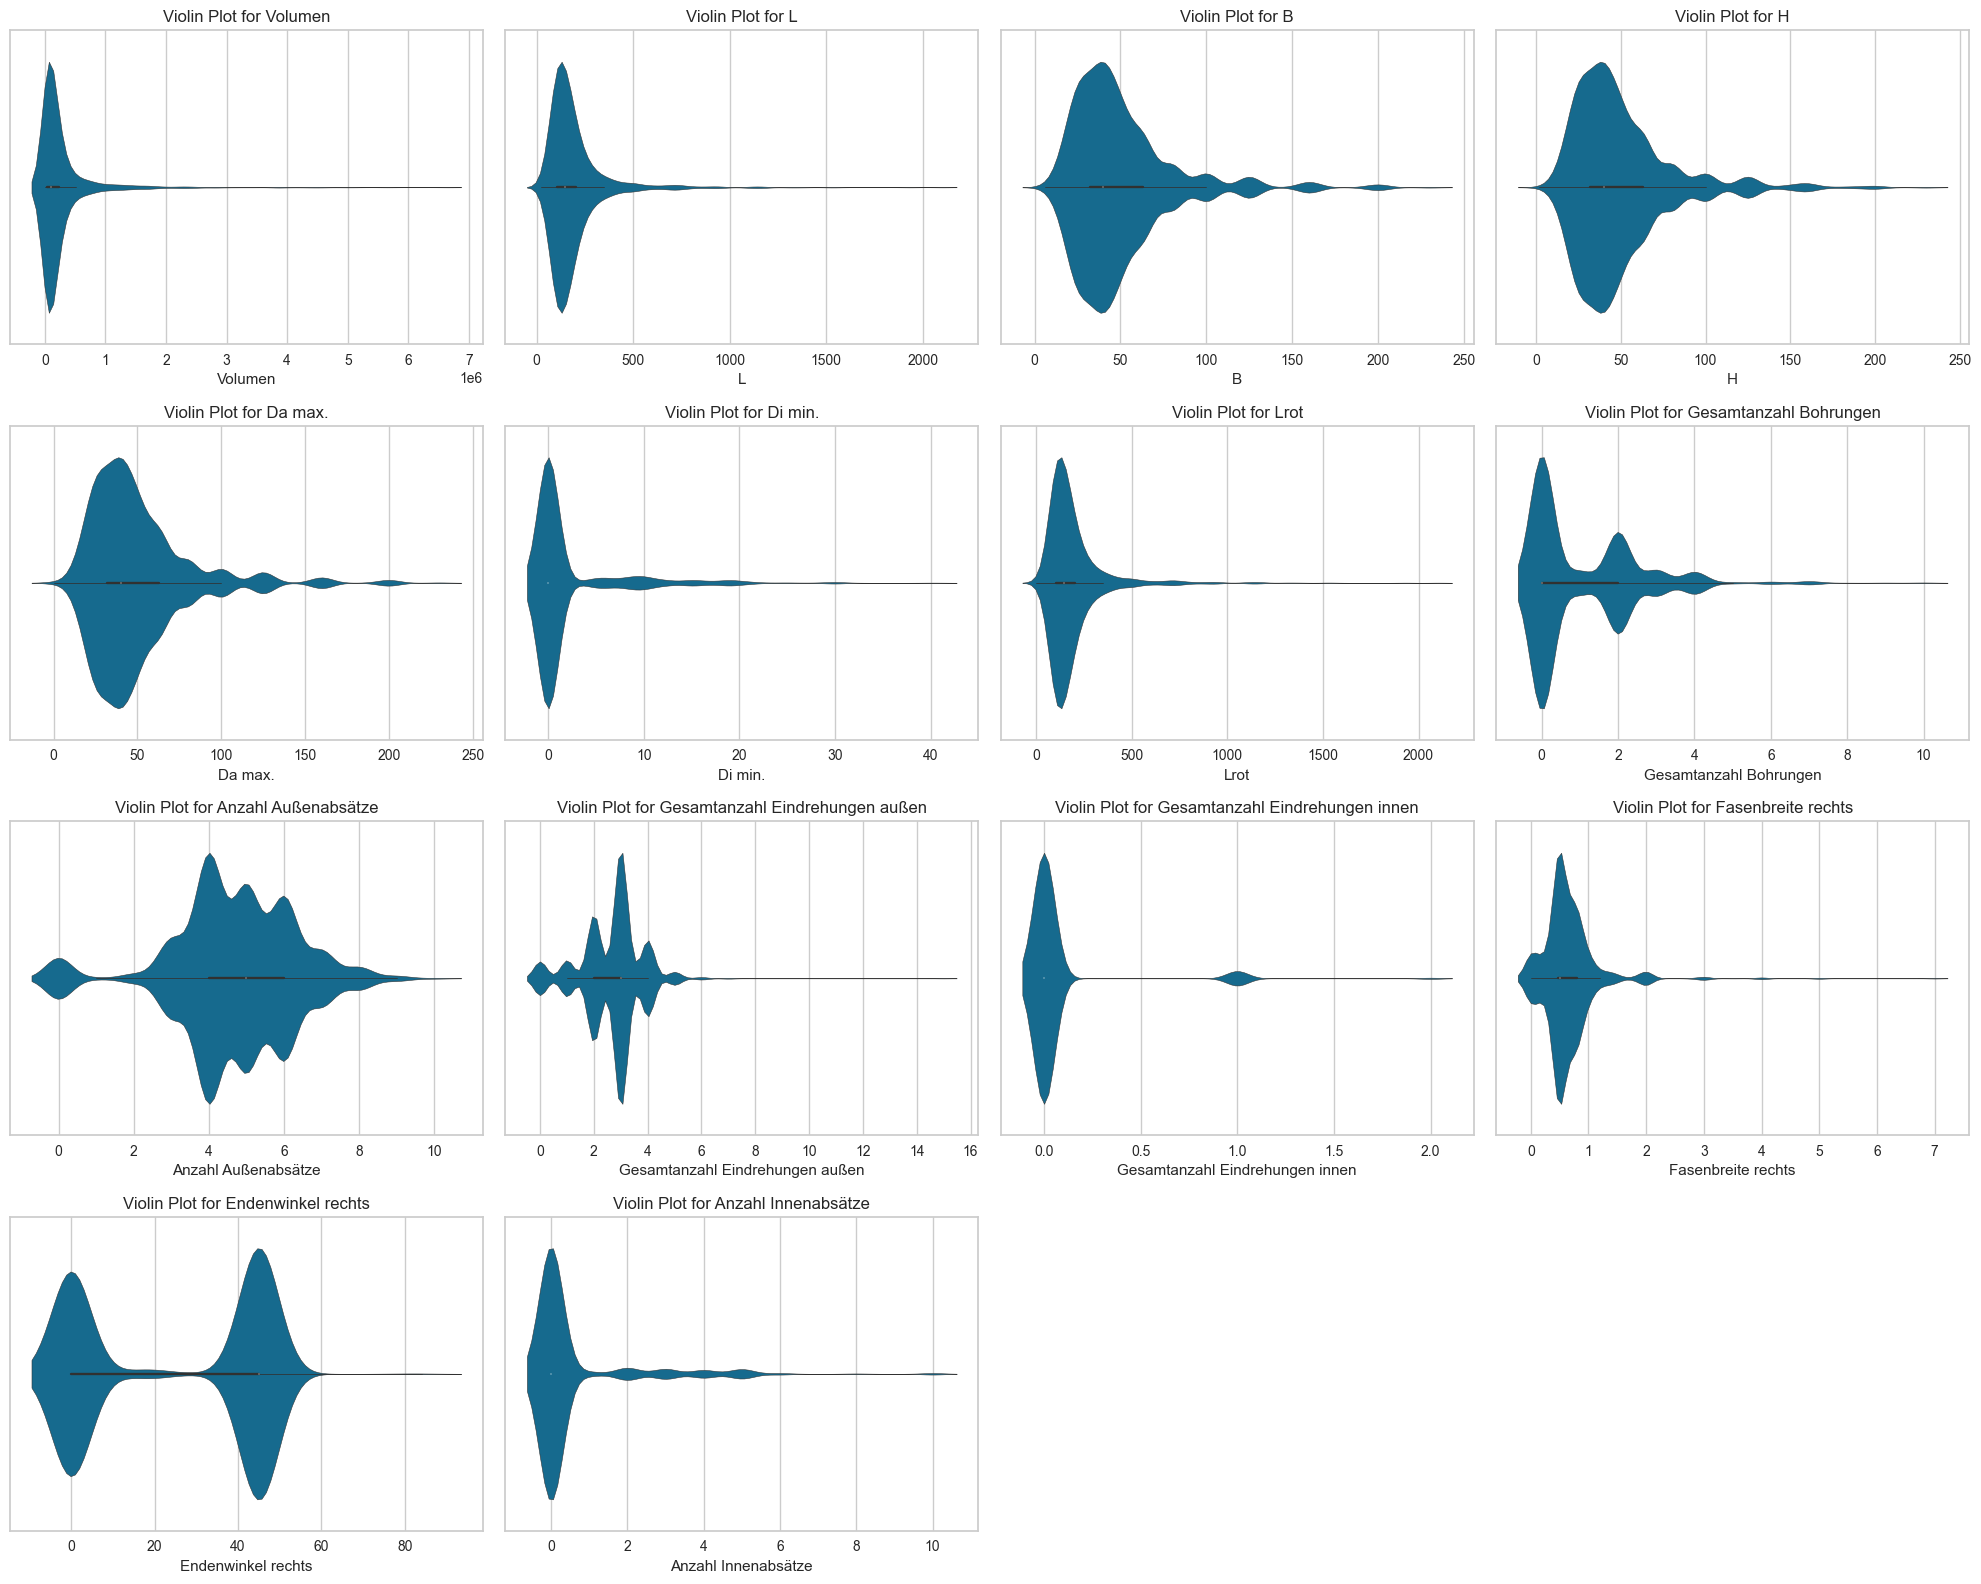

In [8]:
# show violonplot of data
exploration.violinplots(data, num_columns)

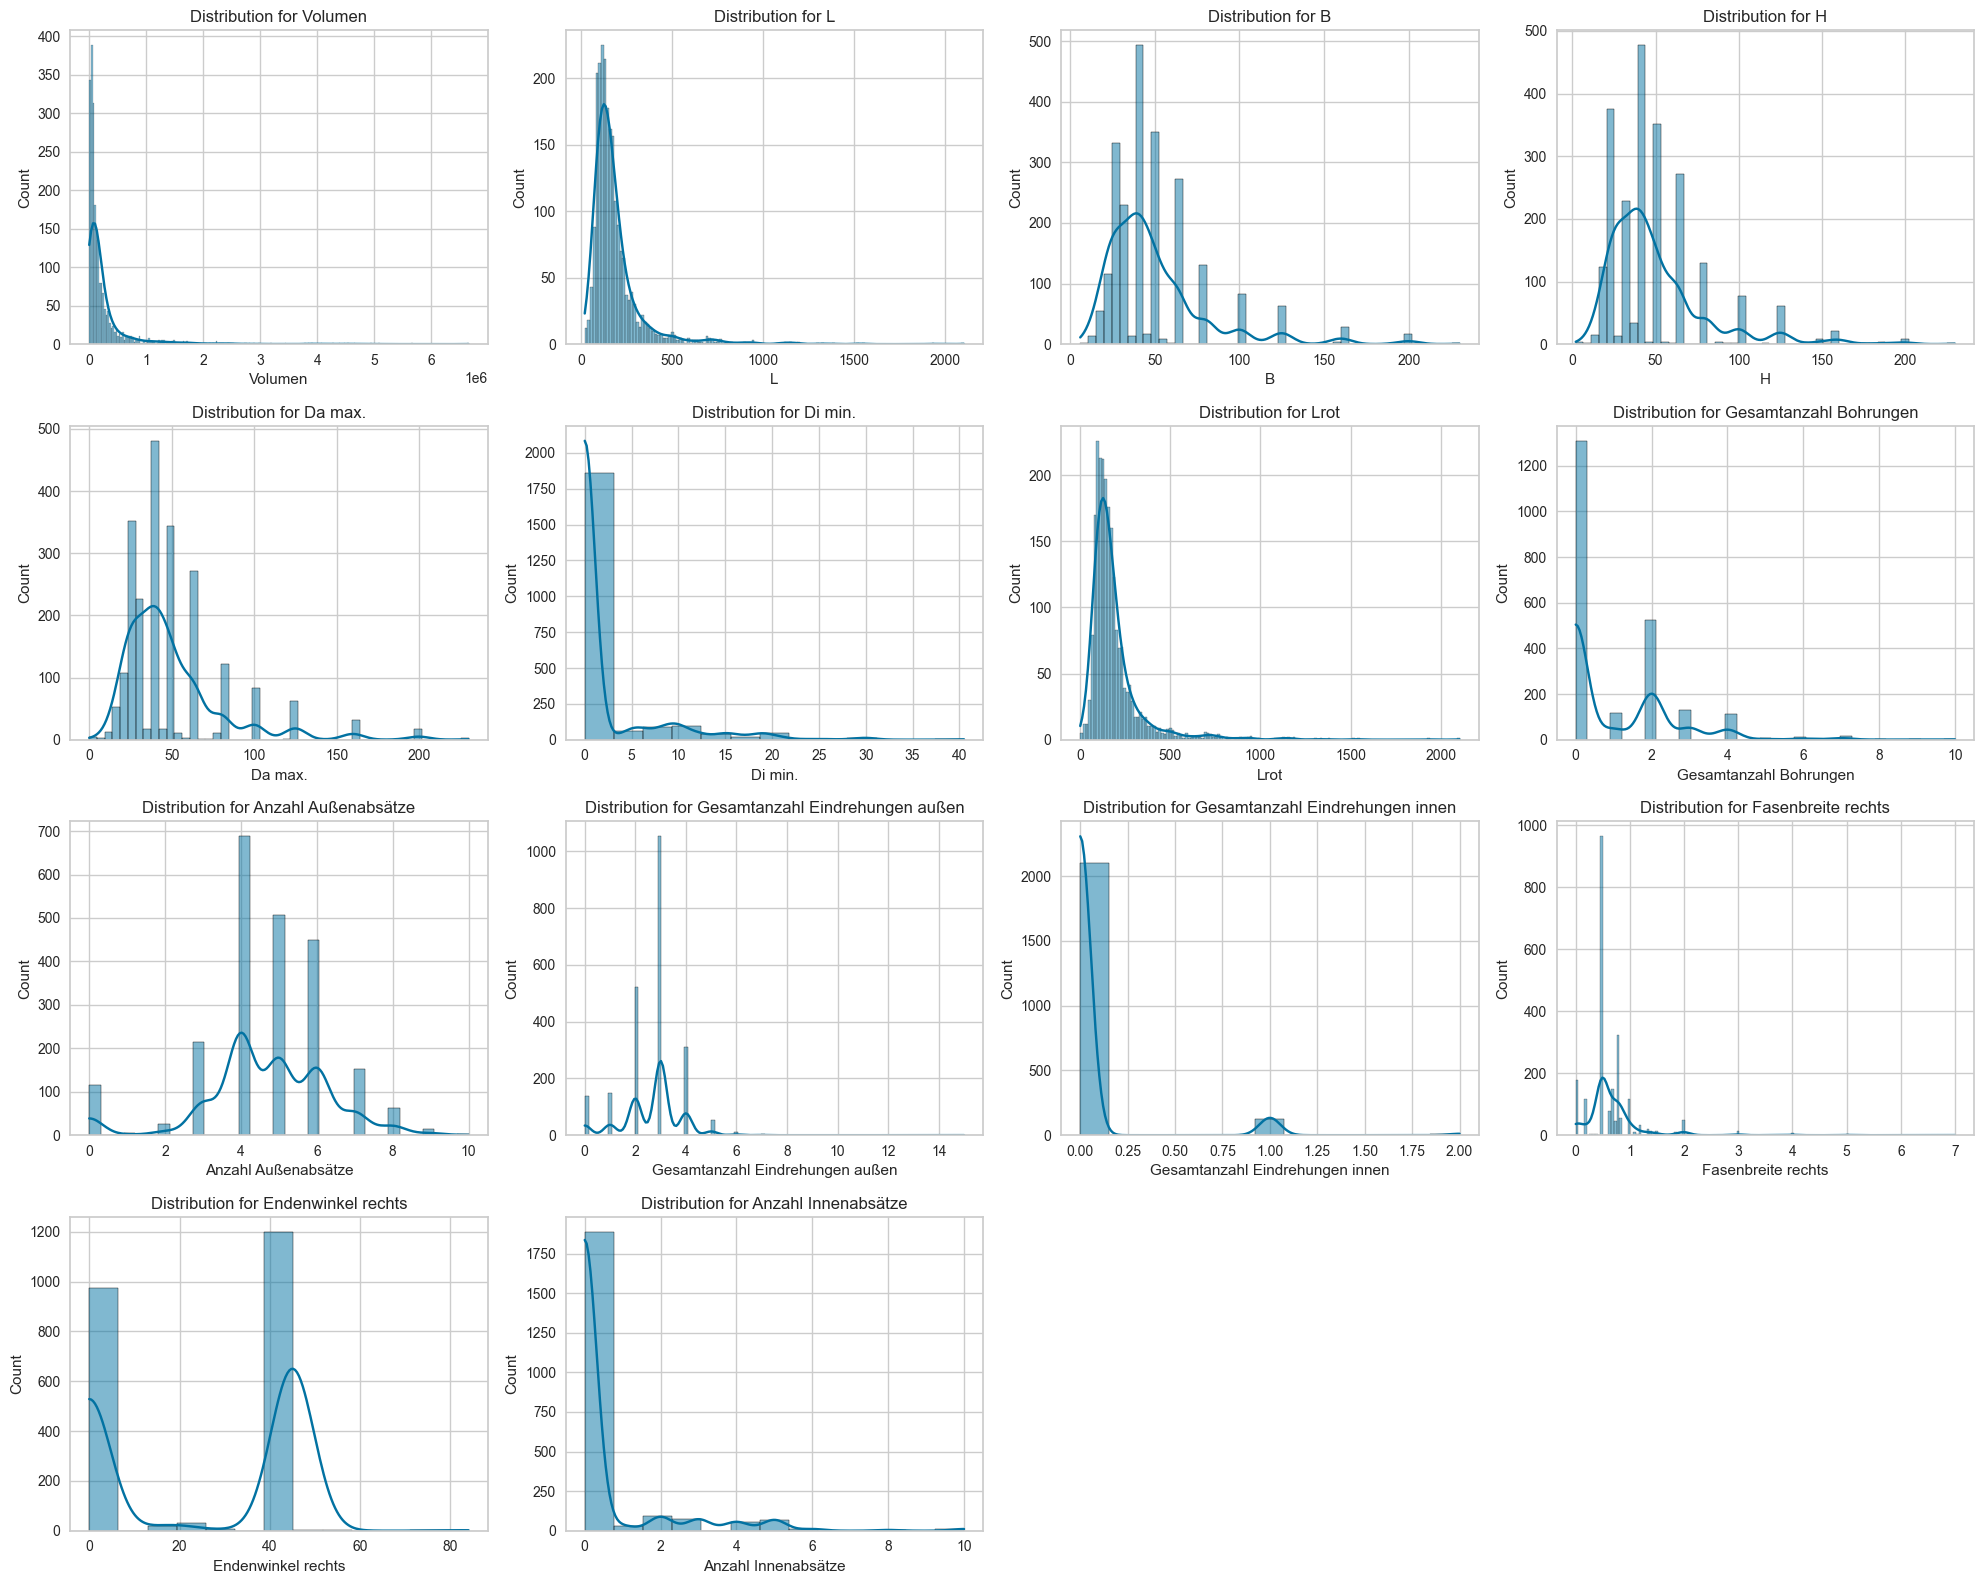

In [9]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

In [10]:
# show parallel_coordinates_plot of data
# exploration.barplots(data, cat_columns)

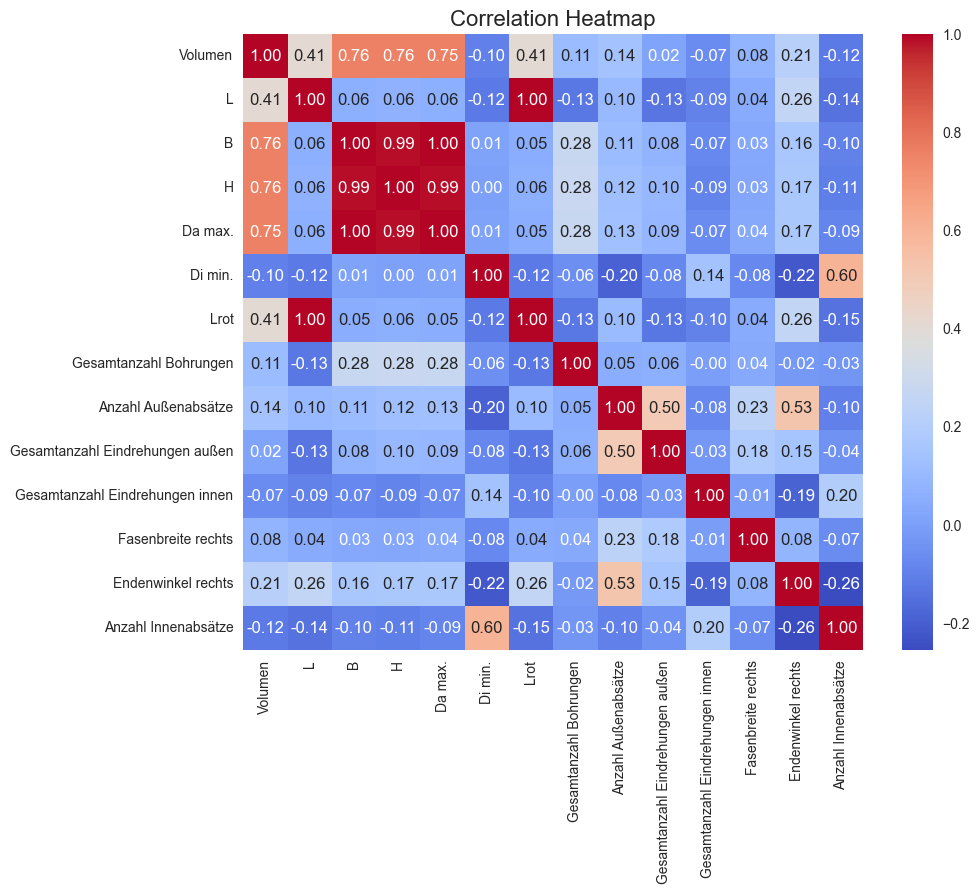

In [11]:
# show heatmap of data
exploration.heatmap(data, num_columns)

In [12]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_einseitig steigend,Innenform_EXCENTR_001,Innenform_Durchgangsbohrung gesenkt,Innenform_ungleichmäßiger Einstich Konus beidseitig,Innenform_gleichmäßiger Einstich Konus beidseitig,Innenform_beidseitig fallend,Innenform_OTHR_004,Innenform_Sackloch gestuft gesenkt,Innenform_OTHR_005,Innenform_OTHR_009
Zeichnung,,,,,,,,,,,,,,,,,,,,,
3500-104-8-V10-CAM,6637.07,89.0,16.0,16.0,16.0,0.0,89.0,0.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3501-133-6-V10-CAM,33975.74,170.0,25.0,25.0,25.0,0.0,170.0,0.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3501-147-7-V10-CAM,87665.41,265.0,32.0,32.0,32.0,0.0,265.0,0.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3501-154-5-V10-CAM,44304.34,147.0,25.0,25.0,25.0,0.0,147.0,0.0,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3501-156-4-V10-CAM,29334.83,145.0,25.0,25.0,25.0,0.0,145.0,0.0,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166-972-55-V10-CAM,115444.45,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166-972-56-V10-CAM,123396.76,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166-972-57-V10-CAM,139295.27,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# apply isolation forest to detect outliers
exploration.isolation_forest(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_einseitig steigend,Innenform_EXCENTR_001,Innenform_Durchgangsbohrung gesenkt,Innenform_ungleichmäßiger Einstich Konus beidseitig,Innenform_gleichmäßiger Einstich Konus beidseitig,Innenform_beidseitig fallend,Innenform_OTHR_004,Innenform_Sackloch gestuft gesenkt,Innenform_OTHR_005,Innenform_OTHR_009
Zeichnung,,,,,,,,,,,,,,,,,,,,,
3502-121-0-V10-CAM,14705.63,39.5,39.5,28.0,39.5,15.29,28.0,2.0,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3502-121-1-V10-CAM,23170.85,39.8,39.8,28.0,39.8,15.29,28.0,2.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3502-134-5-V10-CAM,12782.42,39.5,39.5,28.0,39.5,20.38,28.0,2.0,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3502-134-6-V10-CAM,15973.52,39.8,39.8,23.0,39.8,20.38,23.0,2.0,4.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3502-184-1-V10-CAM,126827.75,127.0,80.0,80.0,80.0,40.00,127.0,0.0,5.0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518-182-PFA-CAM,1827622.55,989.0,50.0,50.0,50.0,0.00,989.0,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3518-192-PFA-CAM,2220321.63,1189.0,50.0,50.0,50.0,0.00,1189.0,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3520-002-V10-CAM,4539554.63,941.5,80.0,80.0,80.0,0.00,941.5,0.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0


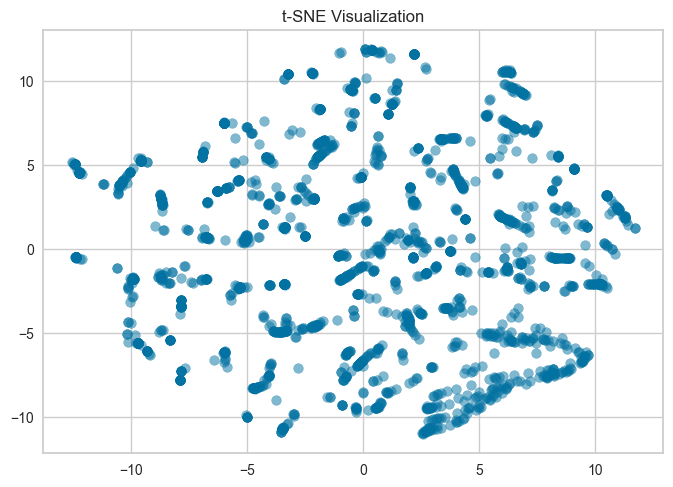

In [14]:
# apply tsne_visualization to visualize the data
exploration.tsne_visualization(data_preprocessed, num_columns)

__Adjustments based on EDA__

In [15]:
# remove colums LRot H and Da max
data = data.drop(columns=['Lrot','H','Da max.'])
data_preprocessed = data_preprocessed.drop(columns=['Lrot','H','Da max.'])

__Clustering__

In [16]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

In [17]:
### plot the elbow plot for the first 20 clusters
clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 100, 202)

AttributeError: module 'prevelop.clustering' has no attribute 'elbow_plot_agglomerative'

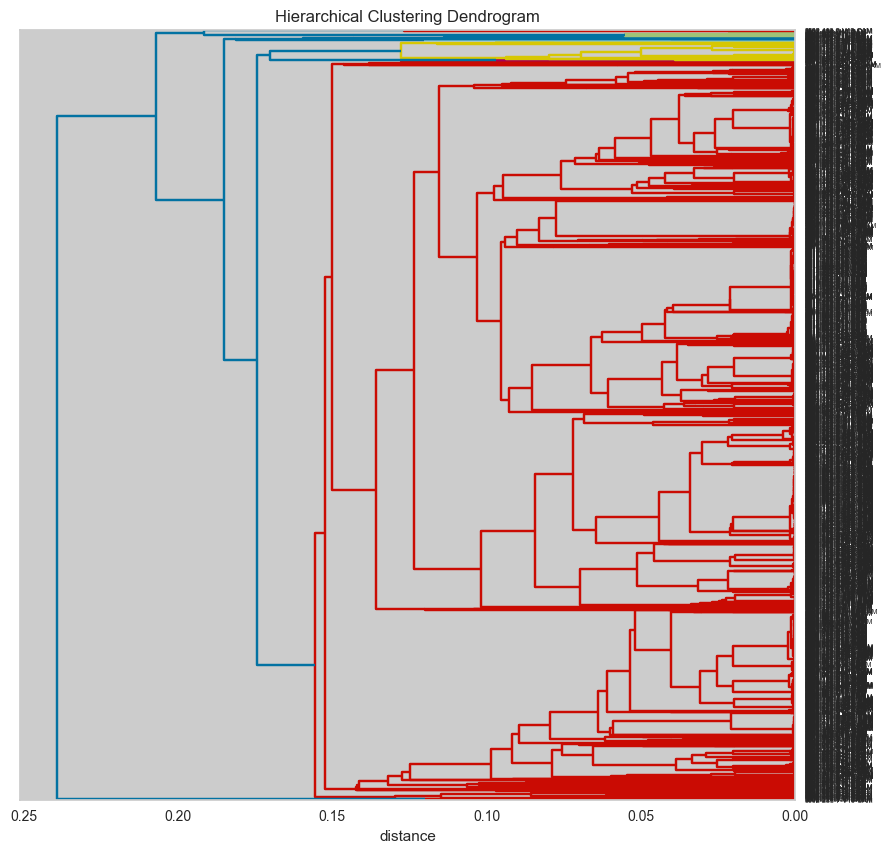

In [ ]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

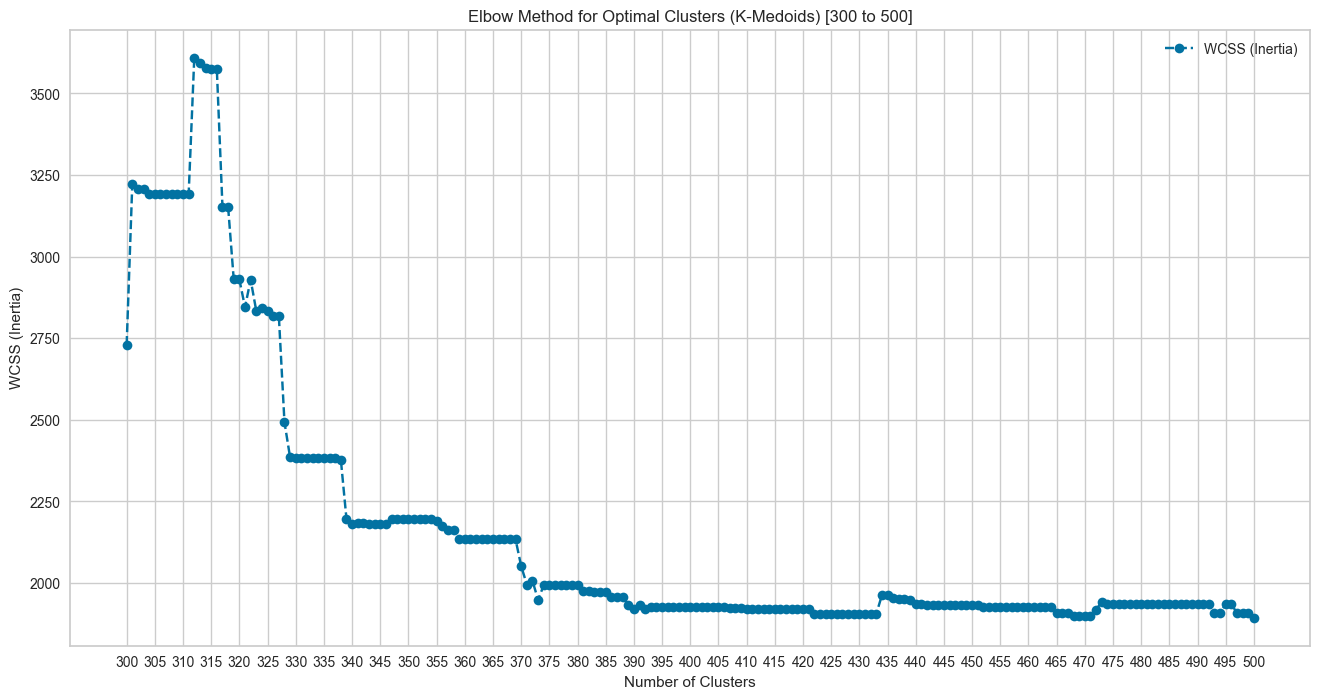

In [ ]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 300, 500)

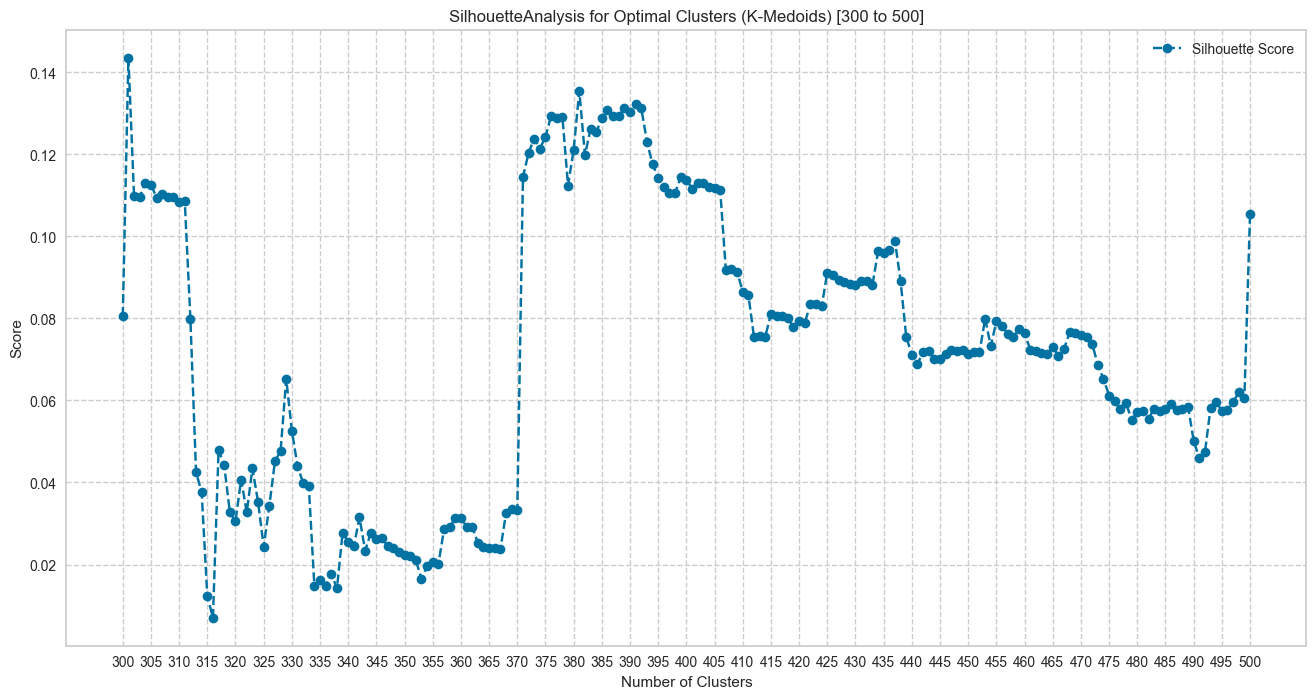

In [ ]:
clustering.silhouette_score_kmedoids(data_preprocessed, 300, 500)

__Evaluation__

In [ ]:
labels = clustering.agglomerative_clustering(distance_matrix, 33)

In [ ]:
# # export the results to a excel file, dataframe with columms 'ID' and 'Cluster'
# df = pd.DataFrame(data={'ID': data.index, 'Cluster': labels})
# df.to_excel('results/results_roemheld_aggl_66.xlsx', index=False)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 1.014441483874011,
 'ch-score': 60.872757075140214,
 'dunn-index': 0.6070728726994514,
 'silhouette-score': 0.23790911596086636}

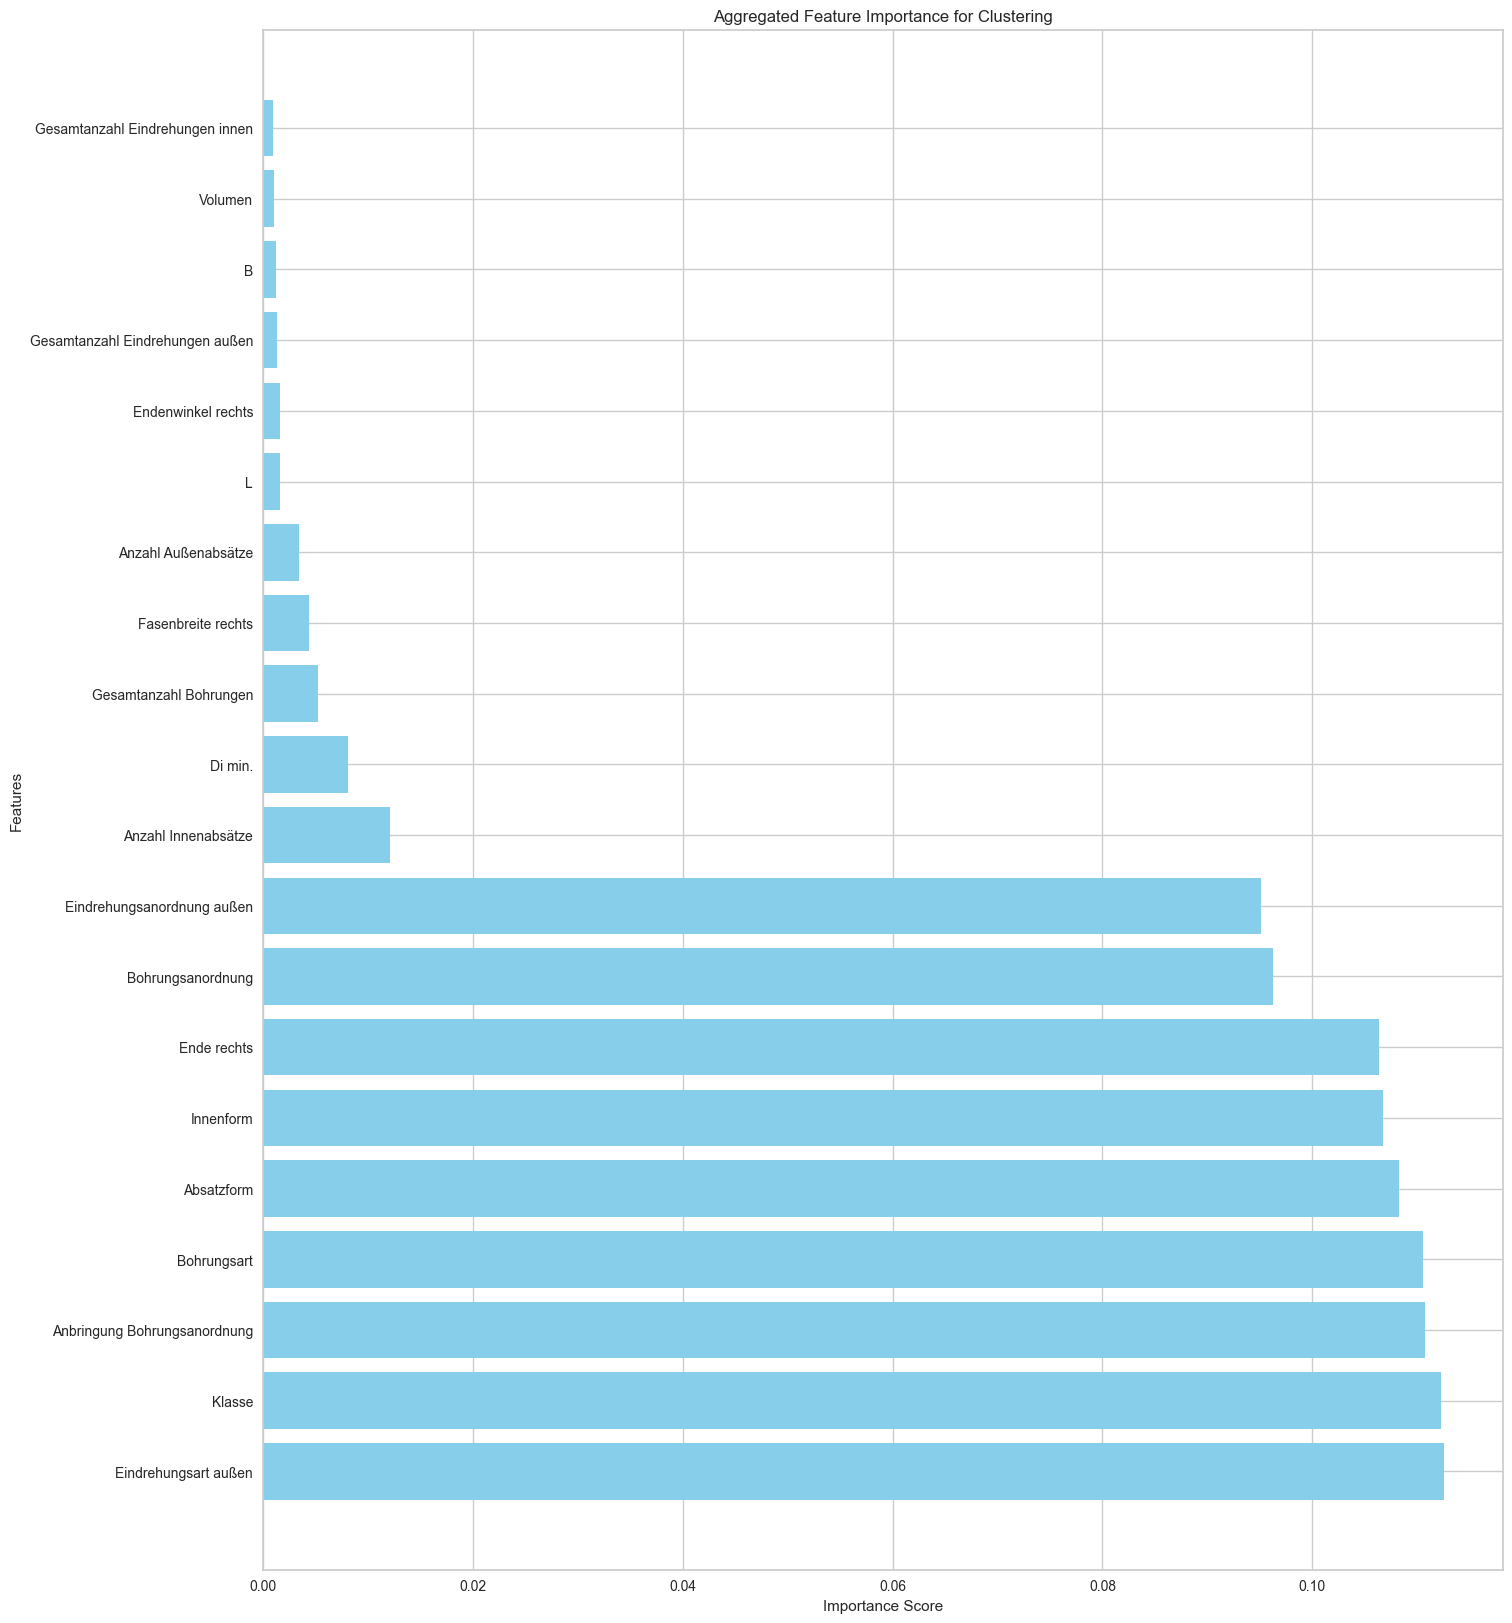

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

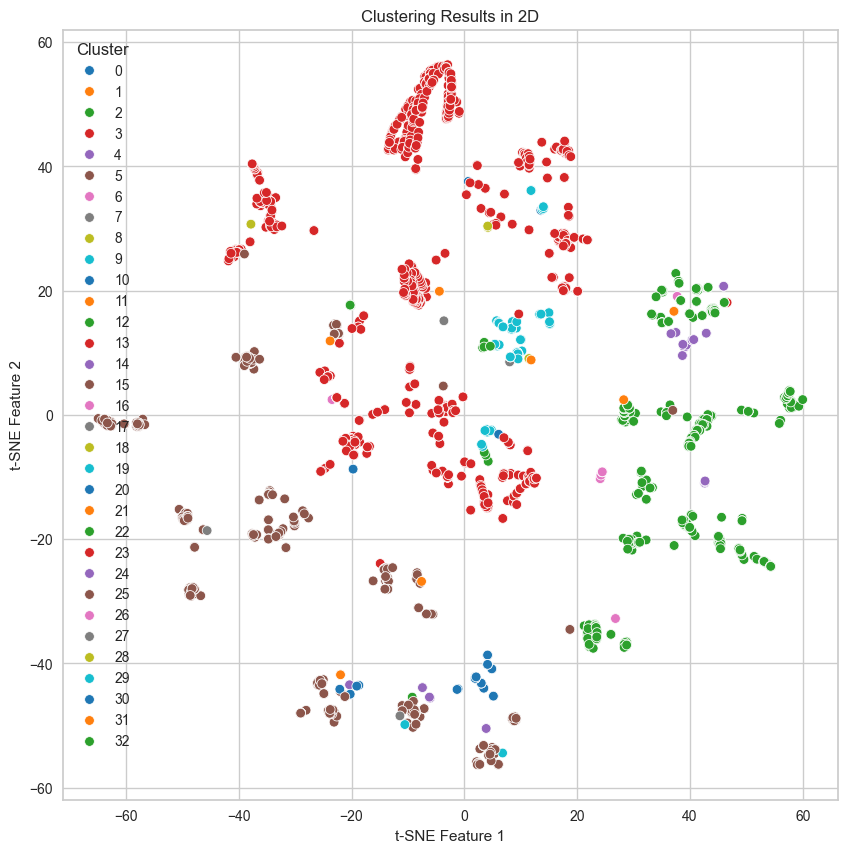

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [ ]:
labels = clustering.kmedoids_clustering(distance_matrix, 50)

In [ ]:
# # export the results to a excel file, dataframe with columms 'ID' and 'Cluster'
# df = pd.DataFrame(data={'ID': data.index, 'Cluster': labels})
# df.to_excel('results/results_roemheld_kmedoids_50.xlsx', index=False)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 2.6154407132077835,
 'ch-score': 129.55127662274955,
 'dunn-index': 0.029228243927639334,
 'silhouette-score': 0.2034241651740714}

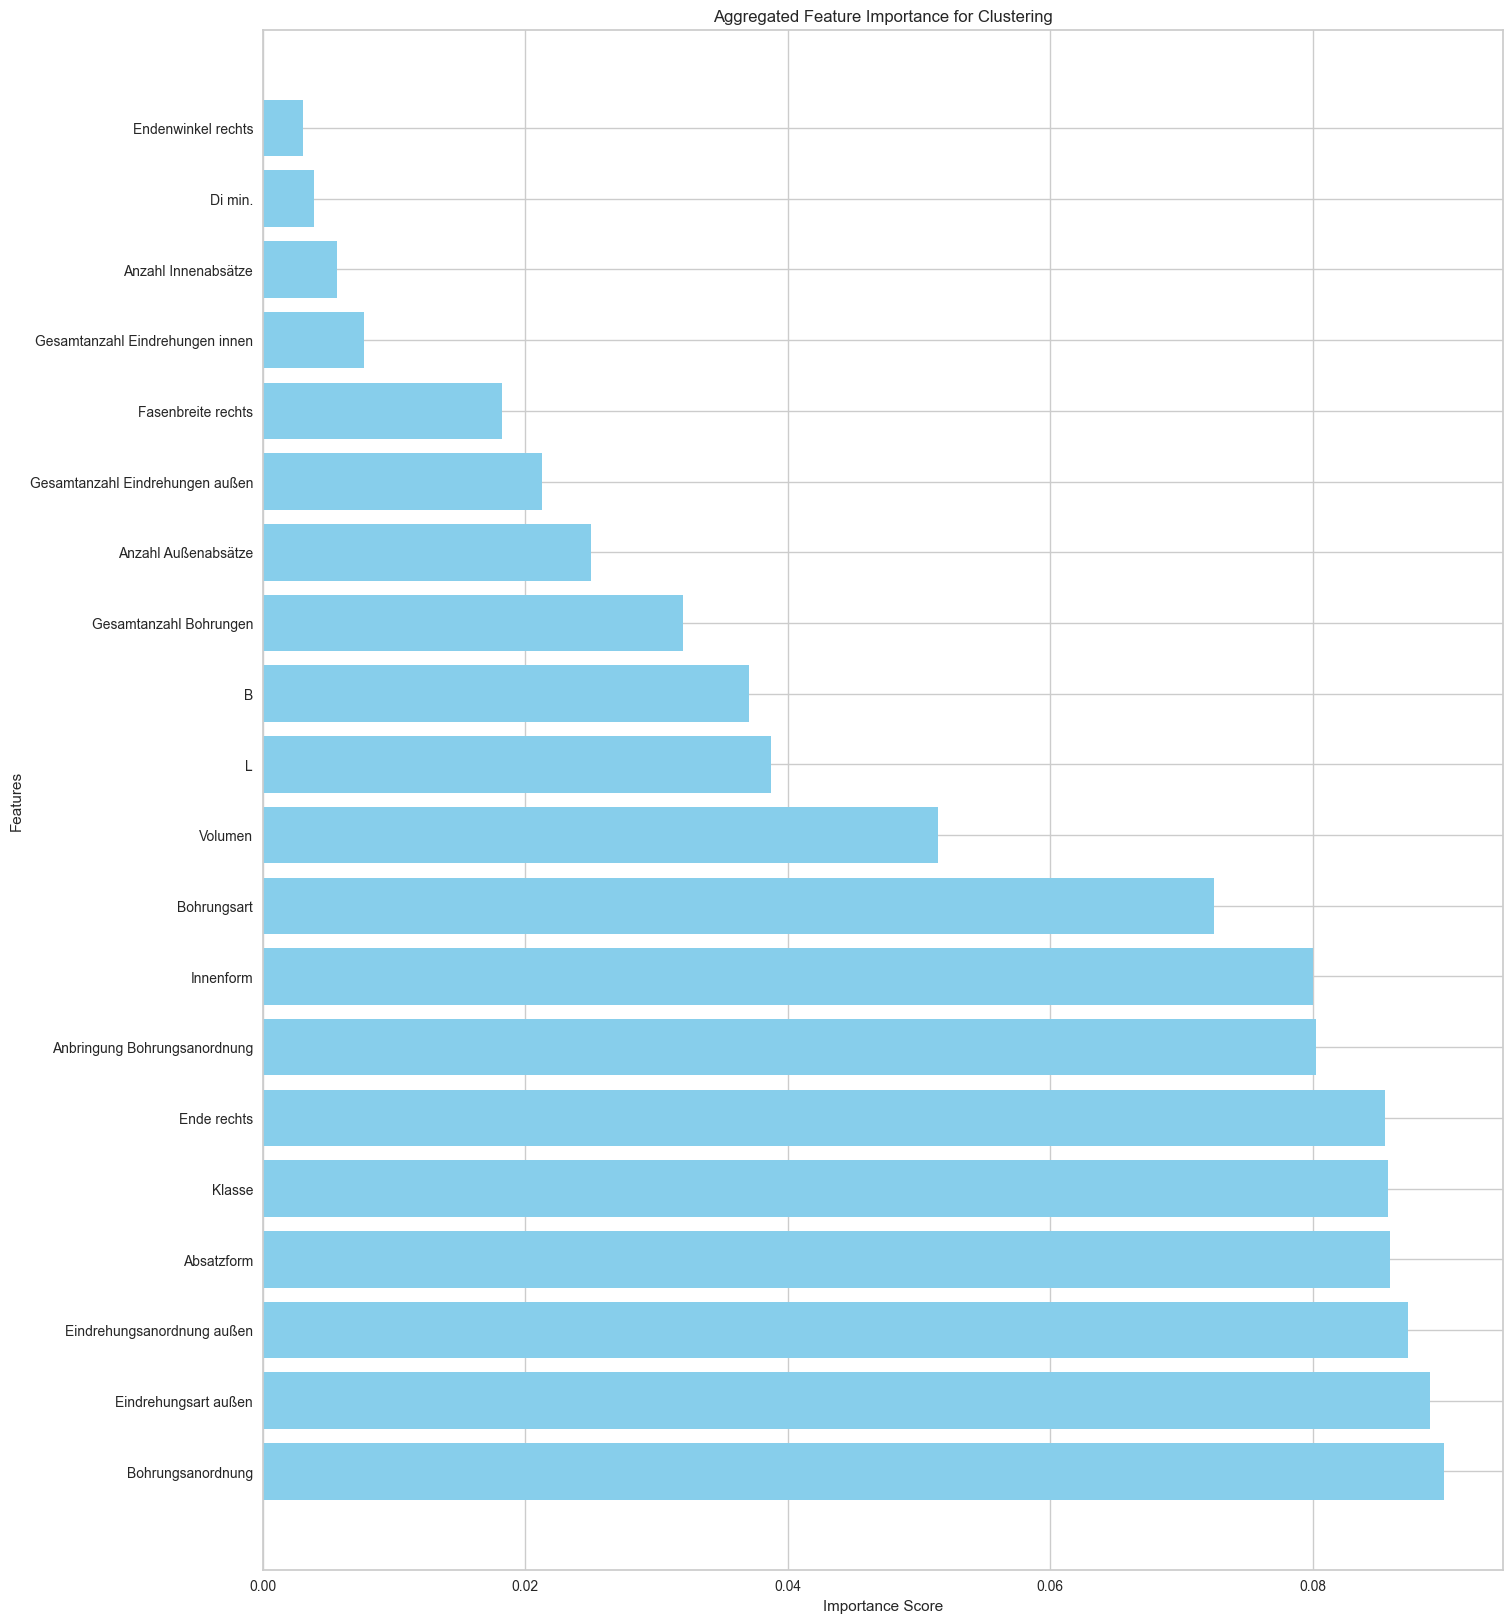

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

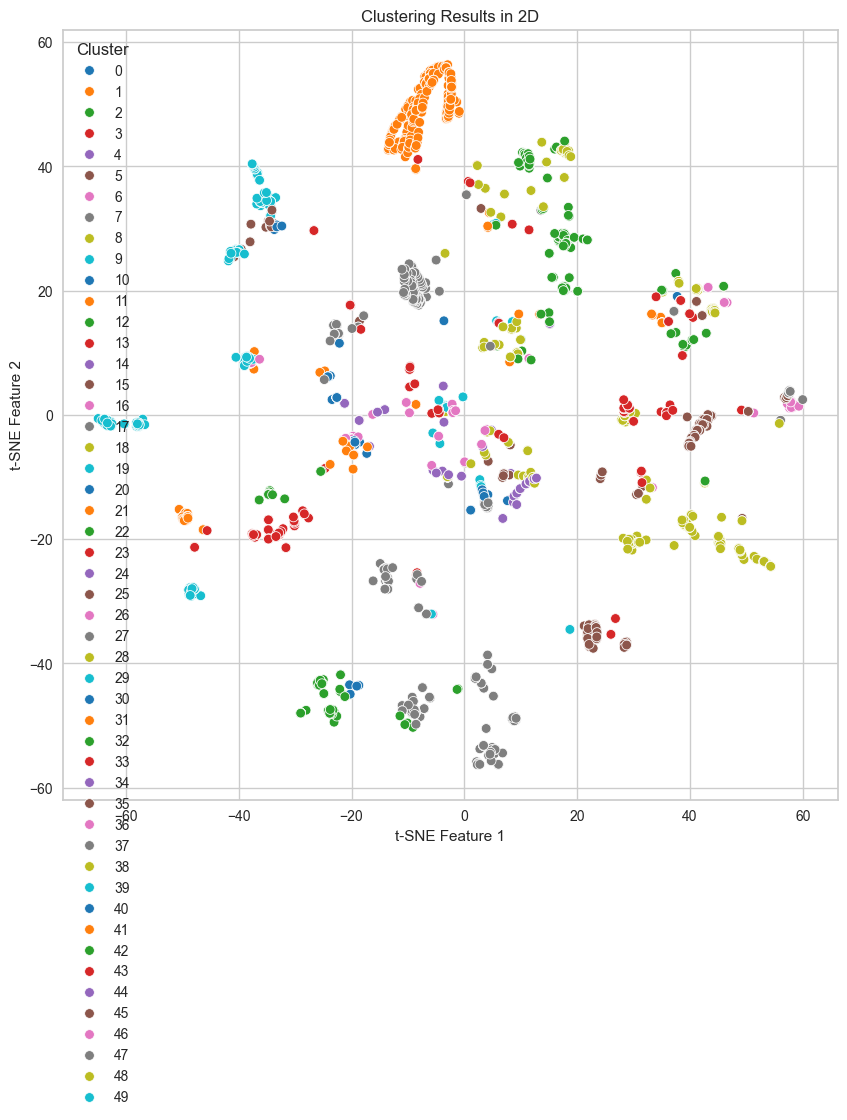

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)